<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [11]:
def sum_prod(X, V):
    result = np.zeros_like(V[0])
    for x, v in zip(X, V):
        result += np.dot(x, v)
    return result

X_test = [np.array([[1, 2], [3, 4]]), np.array([[2, 0], [0, 2]])]
V_test = [np.array([[1], [2]]), np.array([[3], [4]])]
expected_test1 = np.array([[11], [19]])
assert np.array_equal(sum_prod(X_test, V_test), expected_test1), f"Expected {expected_test1}, got {sum_prod(X_test, V_test)}"

X_test2 = [np.array([[1, 0], [0, 1]]), np.array([[2, 2], [2, 2]])]
V_test2 = [np.array([[1], [1]]), np.array([[1], [1]])]
expected_test2 = np.array([[5], [5]])
assert np.array_equal(sum_prod(X_test2, V_test2), expected_test2), f"Expected {expected_test2}, got {sum_prod(X_test2, V_test2)}"

X_test3 = [np.array([[0, 0], [0, 0]]), np.array([[1, 1], [1, 1]])]
V_test3 = [np.array([[0], [0]]), np.array([[1], [1]])]
expected_test3 = np.array([[2], [2]])
assert np.array_equal(sum_prod(X_test3, V_test3), expected_test3), f"Expected {expected_test3}, got {sum_prod(X_test3, V_test3)}"

print("Задача 1: Все тесты пройдены.")


Задача 1: Все тесты пройдены.


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [10]:
def binarize(M, threshold=0.5):
    return np.where(M > threshold, 1, 0)

M_test = np.array([[0.1, 0.7], [0.3, 0.9]])
assert np.array_equal(binarize(M_test, 0.5), np.array([[0, 1], [0, 1]]))

M_test2 = np.array([[0.5, 0.5], [0.5, 0.5]])
assert np.array_equal(binarize(M_test2, 0.5), np.array([[0, 0], [0, 0]]))

M_test3 = np.array([[1, 0], [0, 1]])
assert np.array_equal(binarize(M_test3, 0.3), np.array([[1, 0], [0, 1]]))

print("Задача 2: Все тесты пройдены.")


Задача 2: Все тесты пройдены.


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [9]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(col) for col in mat.T]

mat_test = np.array([[1, 2, 2], [3, 3, 3]])
assert all(np.array_equal(a, b) for a, b in zip(unique_rows(mat_test), [np.array([1, 2]), np.array([3])]))

mat_test2 = np.array([[1, 2], [1, 2]])
assert all(np.array_equal(a, b) for a, b in zip(unique_rows(mat_test2), [np.array([1, 2]), np.array([1, 2])]))

mat_test3 = np.array([[1, 1], [2, 2]])
assert all(np.array_equal(a, b) for a, b in zip(unique_columns(mat_test3), [np.array([1, 2]), np.array([1, 2])]))

print("Задача 3: Все тесты пройдены.")

Задача 3: Все тесты пройдены.


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

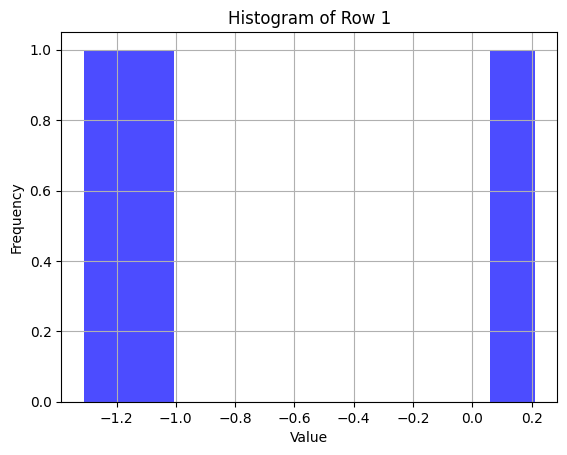

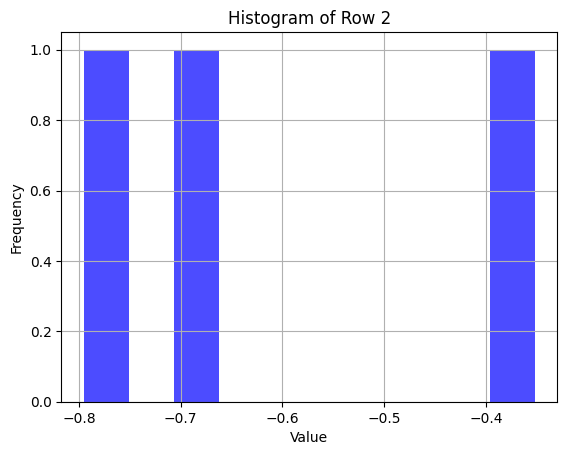

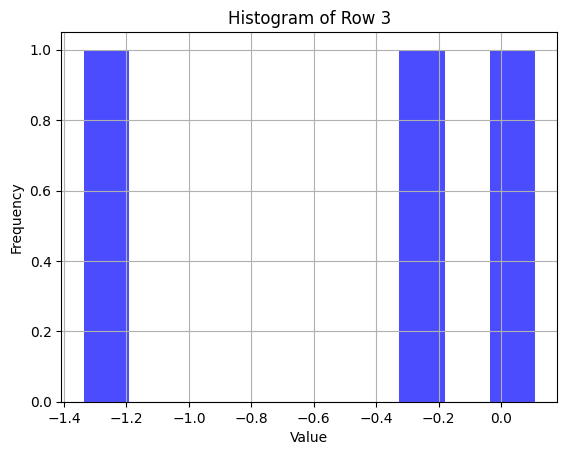

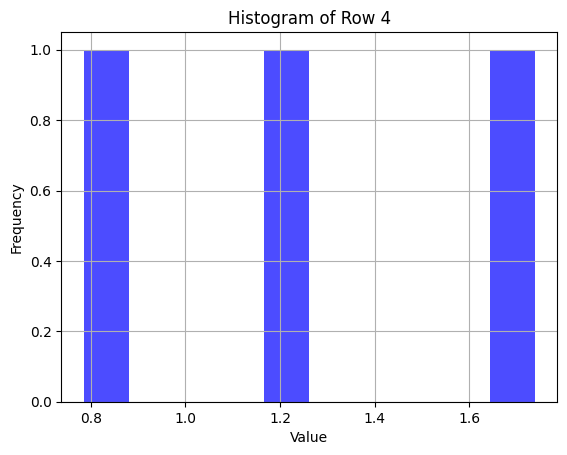

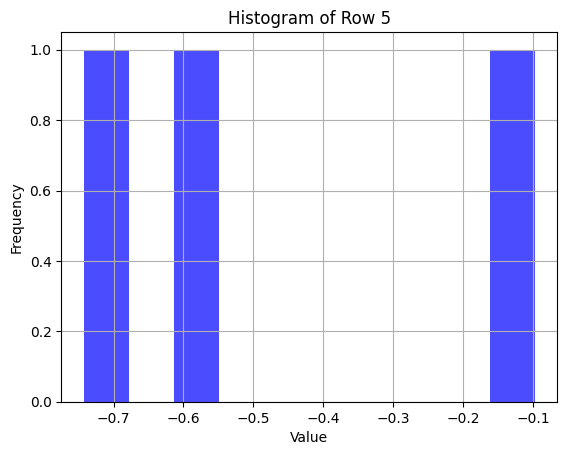

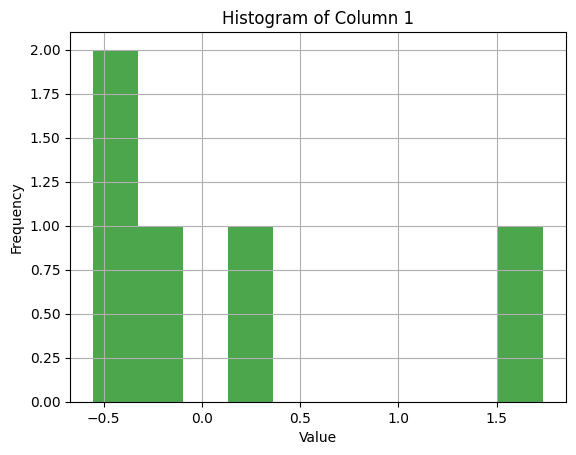

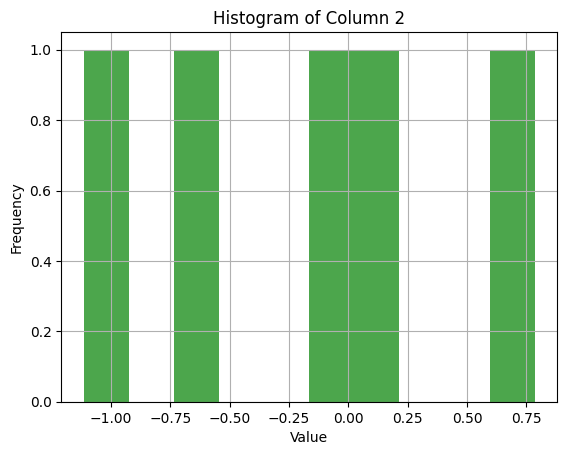

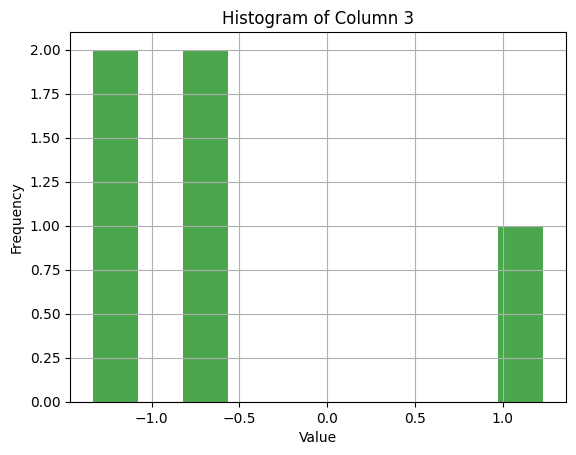

Все тесты пройдены.


In [8]:
def generate_matrix_and_statistics(m, n):
    matrix = np.random.normal(loc=0, scale=1, size=(m, n))
    
    row_means = np.mean(matrix, axis=1)
    row_variances = np.var(matrix, axis=1)

    col_means = np.mean(matrix, axis=0)
    col_variances = np.var(matrix, axis=0)

    for i in range(m):
        plt.figure()
        plt.hist(matrix[i], bins=10, alpha=0.7, color='blue')
        plt.title(f'Histogram of Row {i+1}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.grid()
        plt.show()

    for j in range(n):
        plt.figure()
        plt.hist(matrix[:, j], bins=10, alpha=0.7, color='green')
        plt.title(f'Histogram of Column {j+1}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.grid()
        plt.show()

    return {
        'row_means': row_means,
        'row_variances': row_variances,
        'col_means': col_means,
        'col_variances': col_variances,
        'matrix': matrix
    }

def test_generate_matrix_and_statistics():
    m, n = 5, 3
    result = generate_matrix_and_statistics(m, n)

    assert result['matrix'].shape == (m, n), "Matrix size mismatch"
    
    assert result['row_means'].shape == (m,), "Row means size mismatch"
    assert result['row_variances'].shape == (m,), "Row variances size mismatch"
    assert result['col_means'].shape == (n,), "Column means size mismatch"
    assert result['col_variances'].shape == (n,), "Column variances size mismatch"

    assert not np.isnan(result['row_means']).any(), "Row means contain NaN"
    assert not np.isnan(result['row_variances']).any(), "Row variances contain NaN"
    assert not np.isnan(result['col_means']).any(), "Column means contain NaN"
    assert not np.isnan(result['col_variances']).any(), "Column variances contain NaN"

    print("Все тесты пройдены.")

test_generate_matrix_and_statistics()


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [7]:
import numpy as np

def create_chess_matrix(m, n, a, b):

    matrix = np.zeros((m, n))
    
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b

    return matrix

def test_create_chess_matrix():
    result = create_chess_matrix(3, 3, 1, 2)
    expected = np.array([[1, 2, 1], 
                         [2, 1, 2], 
                         [1, 2, 1]])
    assert np.array_equal(result, expected), f"Ошибка в тесте 1: {result}"

    result = create_chess_matrix(2, 4, 5, -3)
    expected = np.array([[5, -3, 5, -3], 
                         [-3, 5, -3, 5]])
    assert np.array_equal(result, expected), f"Ошибка в тесте 2: {result}"

    result = create_chess_matrix(4, 4, 10, 0)
    expected = np.array([[10, 0, 10, 0],
                         [0, 10, 0, 10],
                         [10, 0, 10, 0],
                         [0, 10, 0, 10]])
    assert np.array_equal(result, expected), f"Ошибка в тесте 3: {result}"

    result = create_chess_matrix(1, 5, 7, 3)
    expected = np.array([[7, 3, 7, 3, 7]])
    assert np.array_equal(result, expected), f"Ошибка в тесте 4: {result}"

    result = create_chess_matrix(5, 1, 4, -1)
    expected = np.array([[4],
                         [-1],
                         [4],
                         [-1],
                         [4]])
    assert np.array_equal(result, expected), f"Ошибка в тесте 5: {result}"

    print("Все тесты пройдены успешно!")

if __name__ == '__main__':
    test_create_chess_matrix()

Все тесты пройдены успешно!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [12]:
from PIL import Image, ImageDraw 
import numpy as np  

def draw_rectangle(m, n, a, b, bg_color, rect_color):
    img = Image.new("RGB", (n, m), bg_color)
    draw = ImageDraw.Draw(img) 

    top_left = ((n - b) // 2, (m - a) // 2)
    bottom_right = ((n + b) // 2, (m + a) // 2)

    draw.rectangle([top_left, bottom_right], fill=rect_color)

    return img


def draw_oval(m, n, a, b, bg_color, oval_color):
    
    img = Image.new("RGB", (n, m), bg_color)
    draw = ImageDraw.Draw(img)  

    top_left = ((n - b * 2) // 2, (m - a * 2) // 2)
    bottom_right = ((n + b * 2) // 2, (m + a * 2) // 2)

    draw.ellipse([top_left, bottom_right], fill=oval_color)

    return img

def test_draw_shapes():

    img_rect = draw_rectangle(200, 300, 100, 150, (255, 255, 255), (0, 0, 255))
    assert img_rect.size == (300, 200), f"Ошибка: размер изображения с прямоугольником {img_rect.size}"
    
    img_array = np.array(img_rect)
    assert (img_array[0, 0] == [255, 255, 255]).all(), f"Ошибка: неверный цвет фона прямоугольника {img_array[0, 0]}"

    img_oval = draw_oval(200, 300, 50, 75, (255, 255, 255), (255, 0, 0))
    assert img_oval.size == (300, 200), f"Ошибка: размер изображения с овалом {img_oval.size}"
    
    img_array = np.array(img_oval)
    assert (img_array[0, 0] == [255, 255, 255]).all(), f"Ошибка: неверный цвет фона овала {img_array[0, 0]}"

    print("Все тесты пройдены успешно!")

if __name__ == '__main__':
    test_draw_shapes()

   
    img_rect = draw_rectangle(300, 400, 150, 200, (255, 255, 255), (0, 128, 0))
    img_rect.show()  

    img_oval = draw_oval(300, 400, 75, 125, (255, 255, 255), (128, 0, 128))
    img_oval.show() 

Все тесты пройдены успешно!


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

Математическое ожидание: 5.5
Дисперсия: 8.25
СКО: 2.8722813232690143
Локальные максимумы: [1 3 5 7]
Локальные минимумы: [2 4 6 8]
Скользящее среднее (размер окна 7): [4.         5.14285714 5.85714286 7.        ]


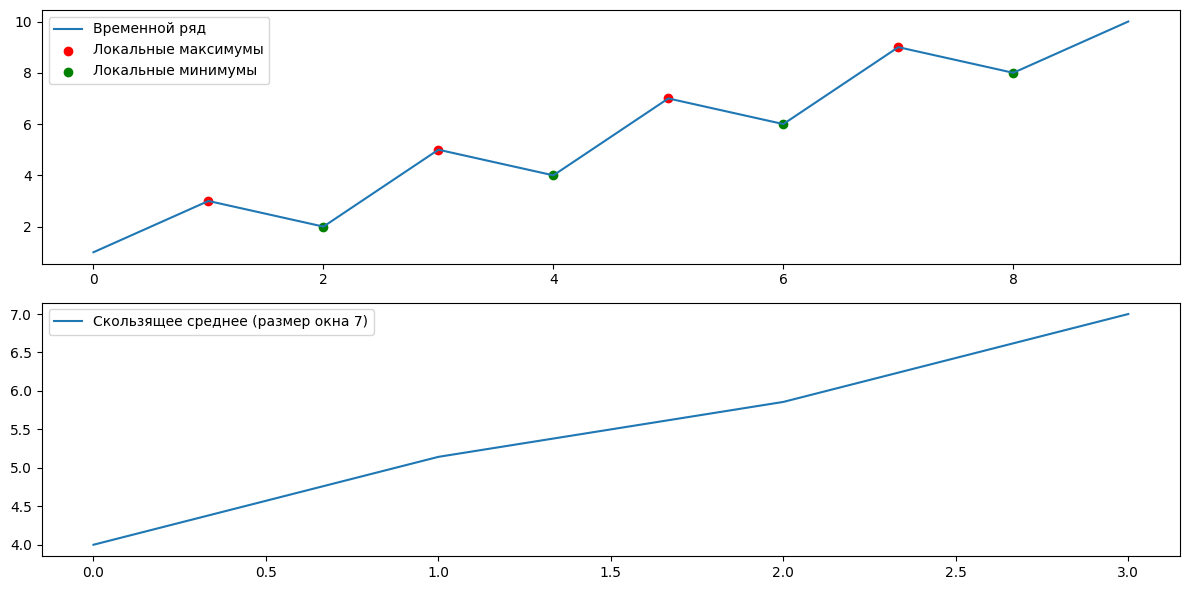

In [13]:
time_series = np.array([1, 3, 2, 5, 4, 7, 6, 9, 8, 10])

mean = np.mean(time_series)
print(f"Математическое ожидание: {mean}")


variance = np.var(time_series)
print(f"Дисперсия: {variance}")


std_dev = np.std(time_series)
print(f"СКО: {std_dev}")


local_maxima = np.where((time_series[1:-1] > time_series[:-2]) & (time_series[1:-1] > time_series[2:]))[0] + 1
local_minima = np.where((time_series[1:-1] < time_series[:-2]) & (time_series[1:-1] < time_series[2:]))[0] + 1

print(f"Локальные максимумы: {local_maxima}")
print(f"Локальные минимумы: {local_minima}")


p = 7  
moving_average = np.convolve(time_series, np.ones(p)/p, mode='valid')

print(f"Скользящее среднее (размер окна {p}): {moving_average}")


plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_series, label='Временной ряд')
plt.scatter(local_maxima, time_series[local_maxima], color='red', label='Локальные максимумы')
plt.scatter(local_minima, time_series[local_minima], color='green', label='Локальные минимумы')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(moving_average, label=f'Скользящее среднее (размер окна {p})')
plt.legend()

plt.tight_layout()
plt.show()


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [14]:
def one_hot_encoding(labels, num_classes):

    one_hot = np.zeros((len(labels), num_classes))
    
    for i, label in enumerate(labels):
        one_hot[i, label] = 1
    
    return one_hot

labels = np.array([0, 2, 3, 1])
num_classes = 4
one_hot_encoded = one_hot_encoding(labels, num_classes)

print("Вектор меток классов:", labels)
print("One-hot-encoding:", one_hot_encoded)


Вектор меток классов: [0 2 3 1]
One-hot-encoding: [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
